# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Modelo machine learning - Churn Card</p></div>

![](https://img.freepik.com/vetores-gratis/conceito-de-protecao-dos-direitos-do-consumidor-a-definicao-de-direito-do-consumidor-e-o-direito-de-ter-informacoes-sobre-a-qualidade-potencia-quantidade-pureza-preco-e-padrao-de-bens-ou-servicos-vector-flat_1150-60891.jpg?t=st=1714415761~exp=1714419361~hmac=978b421119034f56dd06c8a15931eb21afffed3b5a57c9b1b2e5bd2758e97b28&w=1480)

## Problema de Negócio: Churn de Cartões de Crédito e Aplicação de Machine Learning de Classificação

O churn de cartões de crédito é uma preocupação constante para as instituições financeiras, pois a perda de clientes pode resultar em uma diminuição significativa da receita e na perda de participação de mercado. Diante desse desafio, as empresas buscam compreender os fatores que levam os clientes a encerrarem seus cartões de crédito e desenvolver estratégias eficazes para prevenir o churn.

Uma abordagem promissora para lidar com o churn de cartões de crédito é a aplicação de técnicas de machine learning de classificação. Essas técnicas permitem prever se um cliente é propenso a cancelar seu cartão de crédito com base em uma variedade de variáveis, como histórico de transações, comportamento de pagamento, interações com o serviço ao cliente e informações demográficas.

A aplicação de machine learning de classificação no contexto do churn de cartões de crédito envolve várias etapas. Primeiro, é necessário coletar e preparar os dados relevantes para a modelagem, garantindo que eles estejam limpos, completos e prontos para análise. Isso pode envolver a integração de dados de várias fontes, a seleção de características relevantes e a codificação de variáveis categóricas.

Em seguida, os dados preparados são divididos em conjuntos de treinamento e teste, e um algoritmo de classificação, como regressão logística, árvores de decisão, florestas aleatórias ou redes neurais, é treinado nos dados de treinamento. Durante o treinamento, o algoritmo aprende os padrões nos dados que estão associados ao churn e ajusta seus parâmetros para otimizar o desempenho do modelo.

Após o treinamento, o modelo é avaliado usando os dados de teste para verificar sua capacidade de generalização para novos dados. Isso envolve a análise de métricas de desempenho, como precisão, recall, F1-score e área sob a curva ROC, para determinar quão bem o modelo é capaz de prever o churn.

Com base na avaliação do modelo, é possível ajustar os parâmetros do algoritmo e refinar o modelo para melhorar sua precisão e generalização. Uma vez que um modelo satisfatório tenha sido desenvolvido, ele pode ser implantado em produção e usado para prever o churn em tempo real, permitindo que as empresas identifiquem clientes em risco e implementem medidas proativas de retenção.

Em resumo, a aplicação de machine learning de classificação no contexto do churn de cartões de crédito oferece uma abordagem poderosa e eficaz para prevenir a perda de clientes e manter a lucratividade a longo prazo. Ao prever o churn com precisão, as instituições financeiras podem tomar medidas proativas para reter clientes, melhorar a satisfação do cliente e impulsionar o crescimento do negócio.longo prazo.

In [1]:
# Bibliotecas sistema
import re
import os
import unicodedata
import itertools

# Biblioteca para manipulação de arquivos
import pandas as pd
import numpy as np 
import pandas

# Visualização de dados
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuração para os gráficos largura e layout dos graficos
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

# Versão do python
from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

# Carregar as versões das bibliotecas
import watermark

# Versões das bibliotecas
%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Versão python neste Jupyter Notebook: 3.11.5
Author: Versões das bibliotecas

watermark : 2.4.3
re        : 2.2.1
matplotlib: 3.7.1
seaborn   : 0.12.2
numpy     : 1.24.3
plotly    : 5.9.0
pandas    : 1.5.3



# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>1.</b>Base dados</p></div>

- **CLIENTNUM:** Número de identificação único para cada cliente.
- **Attrition_Flag:** Indica se o cliente cancelou o cartão de crédito (churn). Pode ter valores como "Existing Customer" (Cliente Existente) ou "Attrited Customer" (Cliente Cancelado).
- **Customer_Age:** Idade do cliente.
- **Gender:** Gênero do cliente.
- **Dependent_count:** Número de dependentes do cliente.
- **Education_Level:** Nível de educação do cliente.
- **Marital_Status:** Estado civil do cliente.
- **Income_Category:** Categoria de renda do cliente.
- **Card_Category:** Categoria do cartão de crédito (por exemplo, "Blue", "Silver", "Gold", "Platinum").
- **Months_on_book:** Número de meses desde que o cliente abriu a conta.
- **Total_Relationship_Count:** Número total de produtos bancários que o cliente possui.
- **Months_Inactive_12_mon:** Número de meses em que o cliente esteve inativo nos últimos 12 meses.
- **Contacts_Count_12_mon:** Número de contatos que o cliente teve com a instituição nos últimos 12 meses.
- **Credit_Limit:** Limite de crédito do cliente.
- **Total_Revolving_Bal:** Saldo total de crédito rotativo do cliente.
- **Avg_Open_To_Buy:** Média do valor disponível para compra.
- **Total_Amt_Chng_Q4_Q1:** Mudança percentual no valor da transação do último trimestre para o primeiro trimestre.
- **Total_Trans_Amt:** Valor total das transações feitas pelo cliente.
- **Total_Trans_Ct:** Total de transações feitas pelo cliente.
- **Total_Ct_Chng_Q4_Q1:** Mudança percentual no número de transações do último trimestre para o primeiro trimestre.
- **Avg_Utilization_Ratio:** Razão média de utilização do crédito.
- **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:** Valor derivado do modelo de Naive Bayes para prever o churn (não utilizado para análise).
- **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:** Outro valor derivado do modelo de Naive Bayes para prever o churn (não utilizado para análise).

In [2]:
# Base dados

# Definir opções do Pandas para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Base dados
data = pd.read_csv("credit_card_churn.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Visualizando 5 primeiros dados
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# Visualizando 5 últimos dados
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
# Linhas e colunas
data.shape

(10127, 23)

In [6]:
# Info dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# Tipo dados
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>2. </b>Análise dados</p></div>


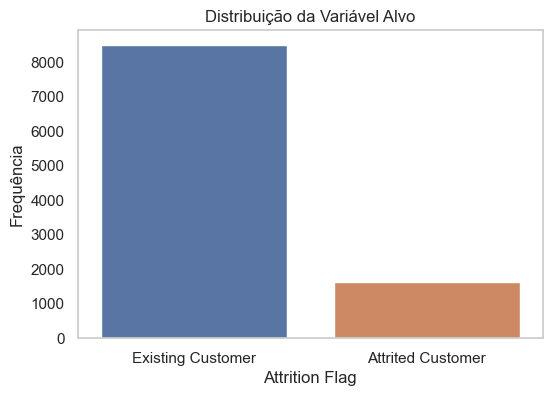

In [8]:
# Distribuição de frequência da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(data, x='Attrition_Flag')
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Attrition Flag')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

**Análise:** Aqui, essa variável representa as colunas, como churn e não churn, que são essenciais como atributos para treinar um modelo de machine learning. A coluna alvo, neste contexto, refere-se à variável que o modelo tentará prever ou classificar, como churn, que é crucial para a análise e previsão de comportamento de clientes.

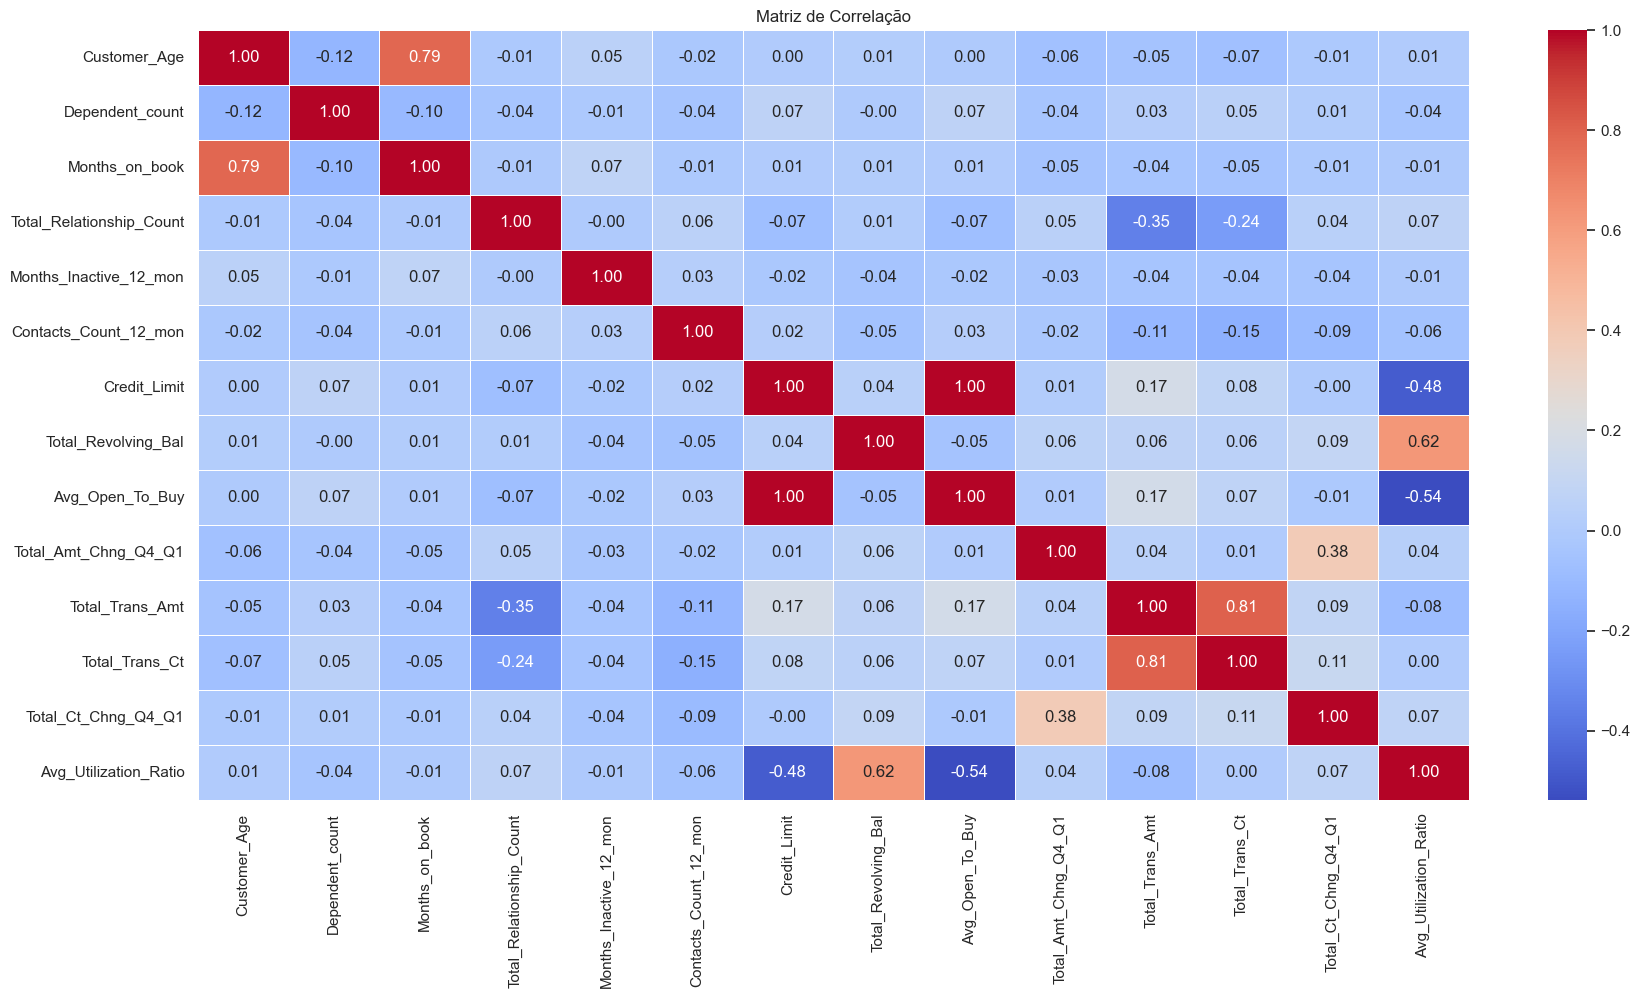

In [9]:
# Análise de Correlação

# Variaveis para correlação
data_corr = data[["Attrition_Flag", "Customer_Age", "Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal","Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]]

# Plot correlation matrix
correlation_matrix = data_corr.corr()
plt.figure(figsize=(20.5, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

**Análise**: O total de transações, o saldo rotativo total e a mudança total no número têm uma correlação negativa moderada com o alvo. Isso faz total sentido. Quanto menos transações um cliente faz, mais provável é que ele cancele. Além disso, clientes com saldos rotativos mais baixos e menos variação em seus números de transações são propensos a cancelar devido à inatividade. 

A idade do cliente e os meses de permanência no livro estão fortemente correlacionados positivamente. Quanto mais velho é um cliente, mais tempo ele passa consumindo os serviços de cartão de crédito do banco e vice-versa. Assim, a empresa deve concentrar seus esforços em manter os clientes antigos e leais e aumentar a permanência dos mais jovens. O limite de crédito e a taxa média de utilização estão moderadamente correlacionados negativamente. Quanto maior o limite de crédito do cliente, menor é a taxa média de utilização. O saldo rotativo total e a taxa média de utilização estão fortemente correlacionados positivamente. Isso faz sentido. 

À medida que um cliente usa mais seu cartão de crédito, ele terá que pagar saldos rotativos mais altos. Curiosamente, o gênero tem uma correlação positiva moderada com o limite de crédito. Isso pode indicar que os clientes do sexo masculino tendem a ter limites de crédito mais altos do que os do sexo feminino. Algumas características que estão naturalmente relacionadas são altamente correlacionadas, como esperado. Este é o caso do valor total da transação e do total de transações. 

Ao construir modelos lineares, devemos nos preocupar com problemas de multicolinearidade, que ocorrem quando duas ou mais variáveis independentes estão altamente correlacionadas. Embora seja diagnosticado com o fator de inflação da variância, observar a correlação de Pearson entre pares pode nos indicar esse problema. Este é o caso aqui. No entanto, uma vez que vou me concentrar no poder preditivo, usando algoritmos mais robustos como o LightGBM, não me preocuparei com isso agora. Curiosamente, o valor médio aberto para comprar e o limite de crédito estão perfeitamente correlacionados positivamente. 

Isso significa que essas duas variáveis têm um relacionamento linear forte e consistente na mesma direção. Isso faz sentido, já que "aberto para comprar" significa o valor restante em seu cartão de crédito para usar e o limite significa o valor usado que ainda não foi pago. Como apresentam essa correlação perfeita, uma delas se torna redundante. Assim, vou descartar o "avg_open_to_buy" na etapa de modelagem porque o "credit_limit" é mais informativo.

In [ ]:
fig, axes = plt.subplots(1, 6, figsize=(30, 5))

sns.scatterplot(data=data, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', ax=axes[0])
sns.scatterplot(data=data, x='Avg_Open_To_Buy', y='Total_Revolving_Bal',  hue='Attrition_Flag', ax=axes[1])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[2])
sns.scatterplot(data=data, x='Total_Revolving_Bal', y='Months_on_book',  hue='Attrition_Flag', ax=axes[3])
sns.scatterplot(data=data, x='Total_Amt_Chng_Q4_Q1', y='Total_Ct_Chng_Q4_Q1',  hue='Attrition_Flag', ax=axes[4])
sns.scatterplot(data=data, x='Credit_Limit', y='Avg_Utilization_Ratio',  hue='Attrition_Flag', ax=axes[5])
plt.tight_layout()
plt.grid(False)
plt.show()

**Análise:** Curiosamente, o limite de crédito e a taxa média de utilização apresentam uma relação de decrescimento exponencial! Isso indica que, à medida que o limite de crédito aumenta, a taxa média de utilização diminui em uma taxa exponencial. Portanto, clientes com limites de crédito mais altos usam seus cartões de crédito menos frequentemente. 

Essa dinâmica sugere que existe uma relação não linear entre o limite de crédito e o uso do cartão, com uma diminuição mais acentuada na taxa de utilização à medida que o limite de crédito aumenta. Isso pode ser um insight valioso para o banco entender os padrões de gastos de seus clientes e ajustar suas estratégias de gerenciamento de crédito e retenção de clientes.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>3. </b>Análise de Outliers</p></div>


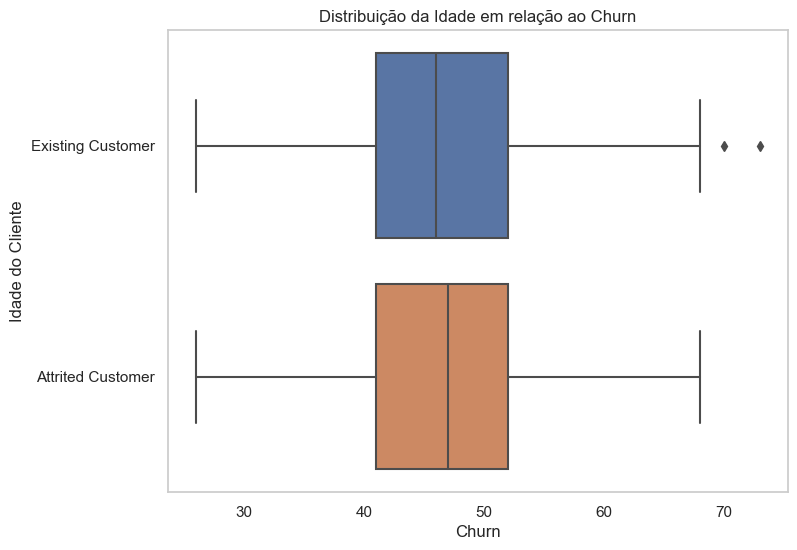

In [10]:
# Análise de Relação entre Idade e Outras Variáveis
# Boxplot da idade dos clientes em relação ao churn
plt.figure(figsize=(8, 6))  
sns.boxplot(x='Customer_Age', y='Attrition_Flag', data=data)
plt.title('Distribuição da Idade em relação ao Churn')
plt.xlabel('Churn')
plt.ylabel('Idade do Cliente')
plt.grid(False)
plt.show()

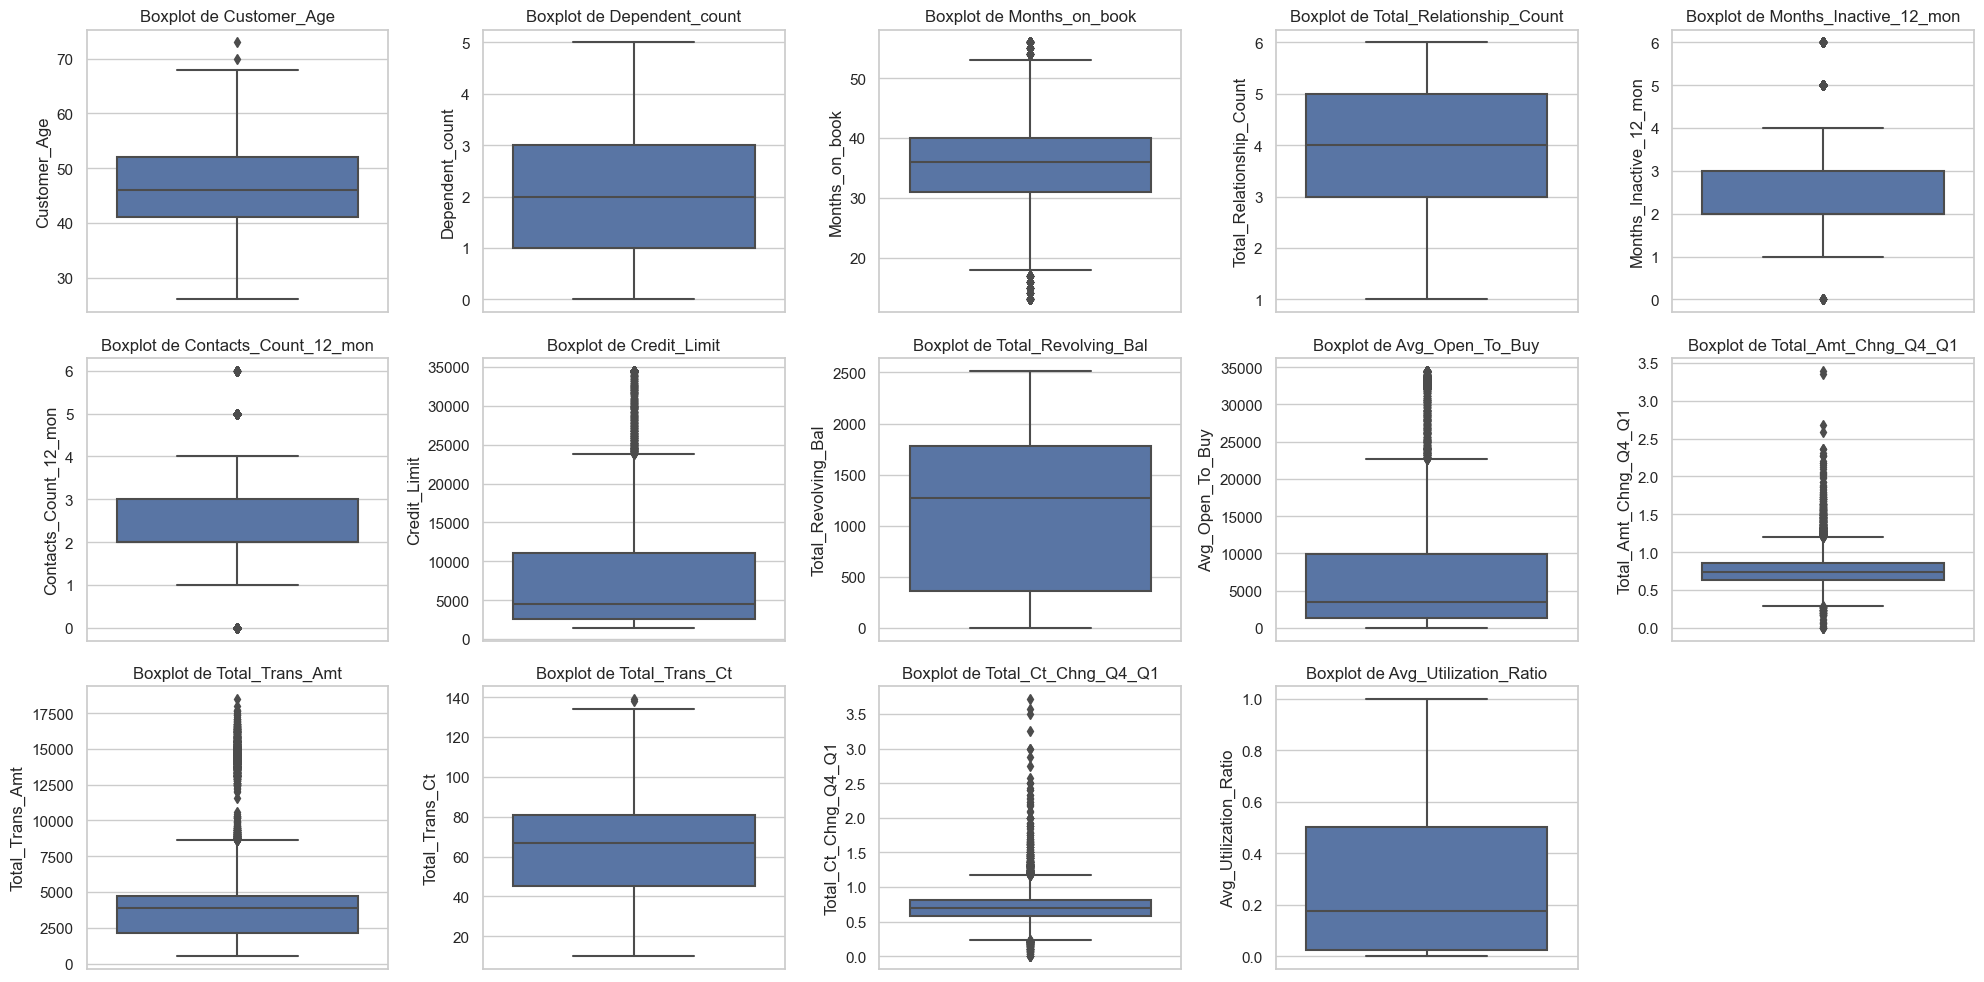

In [11]:
# Selecionar apenas as variáveis especificadas
selected_vars = ["Customer_Age", "Dependent_count", "Months_on_book", 
                 "Total_Relationship_Count", "Months_Inactive_12_mon", 
                 "Contacts_Count_12_mon", "Credit_Limit", "Total_Revolving_Bal",
                 "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt",
                 "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]

# Configurar o tamanho do plot
plt.figure(figsize=(20, 10))

# Iterar sobre as variáveis selecionadas e criar um boxplot para cada uma
for i, col in enumerate(selected_vars):
    plt.subplot(3, 5, i+1)
    sns.boxplot(data=data, y=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>4. </b>Limpeza dados</p></div>


In [12]:
# Verificar dados nulos em cada coluna
null_values = data.isnull().sum()

# Exibir as colunas com dados nulos e a quantidade de valores nulos em cada uma
print("Dados Nulos:")
print(null_values)

Dados Nulos:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                    

In [13]:
# Verificar dados NaN em cada coluna
nan_values = data.isna().sum()

# Exibir as colunas com dados NaN e a quantidade de valores NaN em cada uma
print("Dados NaN:")
print(nan_values)

Dados NaN:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                      

In [14]:
# Verificar dados missing em cada coluna
missing_values = data.isnull().sum()

# Exibir as colunas com dados missing e a quantidade de valores missing em cada uma
print("Dados Missing:")
print(missing_values)


Dados Missing:
CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                  

In [15]:
# Verificar dados missing em todo o DataFrame
missing_values_all = data.isnull()

# Exibir o DataFrame com True para valores missing e False para valores não missing
missing_values_all.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>5. </b>Pré-processamento</p></div>


In [16]:
# Excluir a coluna 'Gender'
data.drop(columns=['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [17]:
# Criar um dicionário de mapeamento
mapping = {'Attrited Customer': 1, 
           'Existing Customer': 0}

# Aplicar o mapeamento para converter a coluna em numérica
data['Attrition_Flag'] = data['Attrition_Flag'].replace(mapping)

# Visualizando dataset
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>6. </b>Feature engineering</p></div>


**Feature engineering**

Feature engineering é uma etapa crucial no processo de preparação de dados em ciência de dados e aprendizado de máquina. Ela envolve a criação ou transformação de variáveis (também conhecidas como features) para melhorar o desempenho dos modelos de machine learning. Uma boa engenharia de features pode aumentar a precisão do modelo, reduzir o overfitting e, consequentemente, gerar insights mais significativos a partir dos dados.

Existem várias técnicas de feature engineering, incluindo a criação de novas features a partir das existentes, normalização de dados, tratamento de valores ausentes e conversão de variáveis categóricas em numéricas, entre outras. Cada técnica é aplicada de acordo com a natureza dos dados e os requisitos do problema em questão.- 

**Label Encder**

O Label Encoder é uma técnica comumente utilizada para converter variáveis categóricas em numéricas. Em muitos conjuntos de dados, é comum encontrar variáveis categóricas que representam categorias textuais, como "alto", "médio" e "baixo", ou "sim" e "não". No entanto, a maioria dos algoritmos de machine learning só aceita entradas numéricas. Portanto, é necessário converter essas variáveis categóricas em números antes de alimentá-las aos modelos.

O Label Encoder atribui um valor único a cada categoria presente na variável categórica. Por exemplo, se tivermos uma variável chamada "Tamanho" com as categorias "Pequeno", "Médio" e "Grande", o Label Encoder pode atribuir os valores 0, 1 e 2, respectivamente, a essas categorias. Dessa forma, as categorias são representadas por números inteiros, tornando-as adequadas para análise por algoritmos de machine learning.

É importante mencionar que o Label Encoder é mais apropriado para variáveis categóricas ordinais, ou seja, aquelas em que existe uma ordem intrínseca entre as categorias. Para variáveis categóricas nominais, onde não há essa ordem, outras técnicas, como o One-Hot Encoding, podem ser mais adequadas.

Em resumo, a feature engineering, juntamente com técnicas como o Label Encoder, desempenha um papel fundamental na preparação de dados para análise e modelagem em ciência de dados e aprendizado de máquina. Essas técnicas permitem que os dados sejam adequadamente processados pelos algoritmos de machine learning, contribuindo para a construção de modelos mais precisos e eficazes.

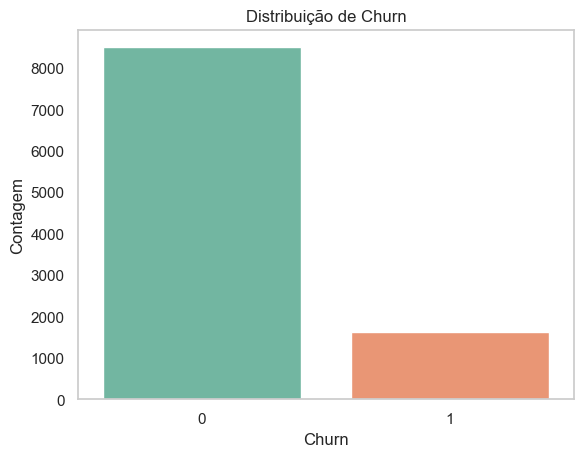

In [18]:
# Verificando a coluna alvo com plot 
sns.countplot(x="Attrition_Flag", data=data, palette='Set2')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.grid(False)
plt.show()

In [19]:
# Imporando biblioteca
from sklearn.preprocessing import LabelEncoder

# Criando o Label encoder
Label_pre = LabelEncoder()

# Transformação tipo dados
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Aplicando encoder
data[label_col]=data[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Visualizando
Label_pre

LabelEncoder()

In [20]:
# Visualizando dataset
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
# Salvnado dataset com Label Encoder
data.to_csv("dataset_LabelEncoder.csv")

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>7. </b>Divisão treino e teste</p></div>

**Divisão dos Dados e a Variável "Churn"**

Outra etapa crucial na preparação de dados é a divisão dos mesmos em conjuntos de treino e teste. Essa divisão permite avaliar o desempenho do modelo em dados não vistos durante o treinamento, ajudando a evitar o overfitting e a avaliar a generalização do modelo.

Normalmente, ao realizar a divisão dos dados, as variáveis preditoras (também conhecidas como features) são separadas da variável de interesse, que é aquela que queremos prever. Por exemplo, em um cenário de previsão de churn em uma empresa de telecomunicações, a variável de interesse pode ser "Churn", indicando se um cliente cancelou ou não o serviço. Nesse caso, as features seriam outras informações relacionadas aos clientes, como tempo de contrato, tipo de plano, número de reclamações, entre outros.

Ao dividir os dados em treino e teste, garantimos que o modelo seja treinado em uma parte dos dados e avaliado em outra parte independente. Isso ajuda a estimar o desempenho real do modelo quando aplicado a novos dados, o que é essencial para tomar decisões informadas no mundo real.

In [22]:
# Dividir os dados em recursos (X) e alvo (y)
X = data.drop("Attrition_Flag", axis=1)  # Excluímos a coluna alvo para obter os recursos
y = data["Attrition_Flag"]  # Definimos a coluna alvo

In [23]:
# Visualizando linhas e coluna x
X.shape

(10127, 19)

In [24]:
# Visualizando linhas e coluna y
y.shape

(10127, 19)

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>8. </b>Treinamento modelo treino e teste</p></div>

**Treinamento do Modelo e Divisão dos Dados**

Uma etapa crucial após a preparação dos dados é o treinamento do modelo. Isso envolve a divisão dos dados em conjuntos de treino e teste. Essa divisão permite avaliar o desempenho do modelo em dados não vistos durante o treinamento, ajudando a evitar o overfitting e a avaliar a capacidade de generalização do modelo.

Na prática, é comum adotar uma divisão padrão, como a popular proporção de 80% para treino e 20% para teste. Essa divisão garante que o modelo seja treinado em uma quantidade substancial de dados, enquanto ainda possui uma quantidade significativa para avaliação.

Por exemplo, ao prever o churn em uma empresa de telecomunicações, dividiríamos os dados em features (como histórico de uso, tipo de plano, etc.) e a variável de interesse, "Churn". Em seguida, aplicaríamos a divisão entre treino e teste, onde 80% dos dados seriam utilizados para treinar o modelo e os 20% restantes para avaliar sua performance.

Essa prática de divisão dos dados é fundamental para garantir que o modelo seja robusto e capaz de generalizar para novos dados não vistos durante o treinamento.

In [25]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Visualiznado dados treino
X_train.shape

(8101, 19)

In [27]:
# Visualiznado dados teste
y_train.shape

(8101,)

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>9. </b>Modelos machine learning</p></div>

Aqui, na quinta etapa do projeto, estou focado na implementação de modelos de machine learning. Estou desenvolvendo oito algoritmos distintos para análise, que incluem Regressão Logística, Naive Bayes, Árvore de Decisão, Random Forest, AdaBoost, Gradient Boosting, XGBoost e LightGBM. Essa diversidade de algoritmos nos permite explorar diferentes abordagens e técnicas para o problema em questão. Durante o processo de treinamento, acompanhamos de perto o desempenho de cada modelo, buscando identificar aquele que melhor se adapta aos dados e oferece as previsões mais precisas. Este estágio é crucial, pois nos permite avaliar e comparar o desempenho de cada algoritmo, selecionando assim o modelo de machine learning mais eficaz para a nossa aplicação específica.

Ao longo deste estágio, estou desenvolvendo e treinando oito algoritmos de machine learning distintos. Esses algoritmos foram cuidadosamente selecionados para abranger uma ampla gama de técnicas e características, visando capturar a complexidade e nuances dos dados:s informadas.

-**Regressão Logística:** Um modelo linear usado para resolver problemas de classificação binária.

-**Naive Bayes:** Um modelo probabilístico baseado no teorema de Bayes, adequado para problemas de classificação com características independentes.

-**Árvore de Decisão:** Um modelo que utiliza uma estrutura de árvore para representar regras de decisão hierárquicas.

-**Random Forest:** Uma técnica de ensemble learning que combina múltiplas árvores de decisão para melhorar a precisão e a robustez do modelo.

-**AdaBoost:** Outro algoritmo de ensemble learning que ajusta iterativamente os pesos das observações para focar nos casos mais difíceis.

-**Gradient Boosting:** Uma técnica de ensemble learning que constrói árvores de decisão sequencialmente, otimizando um critério de perda específico.

-**XGBoost:** Uma implementação eficiente de gradient boosting, conhecida por sua velocidade e desempenho superior.

-**LightGBM:** Outra implementação de gradient boosting, projetada para treinar modelos rapidamente e com uso eficiente de memória.

-**Treinamento e Avaliação**

Cada um desses algoritmos está sendo treinado e ajustado utilizando as melhores práticas de machine learning. Após o treinamento, avaliamos o desempenho de cada modelo em um conjunto de validação, utilizando métricas adequadas ao nosso problema, como precisão, recall, F1-score, entre outras.

-**Seleção do Melhor Modelo**

Ao final deste processo, compararemos o desempenho de todos os modelos e selecionaremos aquele que apresentar os melhores resultados de acordo com nossos critérios de avaliação. Essa escolha será fundamentada não apenas na métrica de desempenho, mas também na interpretabilidade do modelo, sua capacidade de generalização e sua adequação aos requisitos do problema em questão.

Essa abordagem meticulosa e abrangente nos permitirá identificar o modelo de machine learning mais eficaz para resolver nosso problema específico, fornecendo insights valiosos e impulsionando a tomada de decisões informadas.


In [28]:
%%time

# Importando bibliotecas
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance as plot_importance_xgb
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier, plot_importance as plot_importance_lgbm
import matplotlib.pyplot as plt

# Métricas e avaliação modelo
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report


# Dicionário de modelos
modelos = { 
    # Modelo Regressão logística
    "Regressao Logistica": LogisticRegression(),
    
    # Modelo Naive Bayes
    "Naive Bayes": GaussianNB(),
       
    # Modelo Decision Tree
    "Decision Tree Classifier": DecisionTreeClassifier(),
    
    # Modelo Random Forest
    "Random Forest": RandomForestClassifier(),
    
    # Modelo AdaBoost
    "AdaBoost": AdaBoostClassifier(),
    
    # Modelo Gradient Boosting
    "Gradient Boosting": GradientBoostingClassifier(),
    
    # Modelo XGBoost
    "XGBoost": XGBClassifier(),
    
    # Modelo LightGBM
    "LightGBM": LGBMClassifier()
}


# Treinamento de modelos com tqdm
for nome, modelo in tqdm(modelos.items(), desc="Treinando modelos", total=len(modelos)):

    # Treinamento modelo
    modelo.fit(X_train, y_train)

    # Score modelo
    score = modelo.score(X_test, y_test)
    
    # Previsão modelo
    modelo_pred = modelo.predict(X_test)

    # Visualizando os modelos
    print()
    tqdm.write(f"Modelo: {nome} possui Acurácia {score:.2%}")

Treinando modelos:  38%|████████████████████████▍                                        | 3/8 [00:00<00:00, 12.76it/s]


Modelo: Regressao Logistica possui Acurácia 87.61%

Modelo: Naive Bayes possui Acurácia 88.30%

Modelo: Decision Tree Classifier possui Acurácia 92.99%


Treinando modelos:  38%|████████████████████████▍                                        | 3/8 [00:02<00:00, 12.76it/s]


Modelo: Random Forest possui Acurácia 95.76%


Treinando modelos:  62%|████████████████████████████████████████▋                        | 5/8 [00:02<00:02,  1.36it/s]


Modelo: AdaBoost possui Acurácia 95.06%


Treinando modelos:  88%|████████████████████████████████████████████████████████▉        | 7/8 [00:06<00:01,  1.01s/it]


Modelo: Gradient Boosting possui Acurácia 96.54%

Modelo: XGBoost possui Acurácia 96.45%


Treinando modelos: 100%|█████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.27it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705

Modelo: LightGBM possui Acurácia 96.84%
CPU times: total: 5.42 s
Wall time: 6.98 s


# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>10. </b>Métricas e matriz de confusão relatório classificação</p></div>


Modelo de Machine Learning: Regressao Logistica





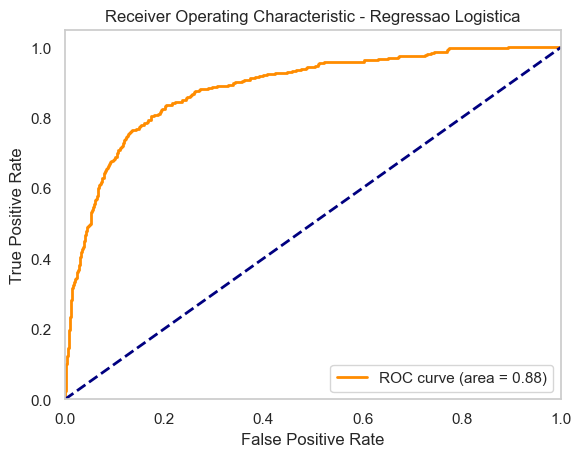



Acurácia: 0.8761105626850938




Confusion matrix 

 [[1646   53]
 [ 198  129]]

True Positives(TP) =  1646

True Negatives(TN) =  129

False Positives(FP) =  53

False Negatives(FN) =  198




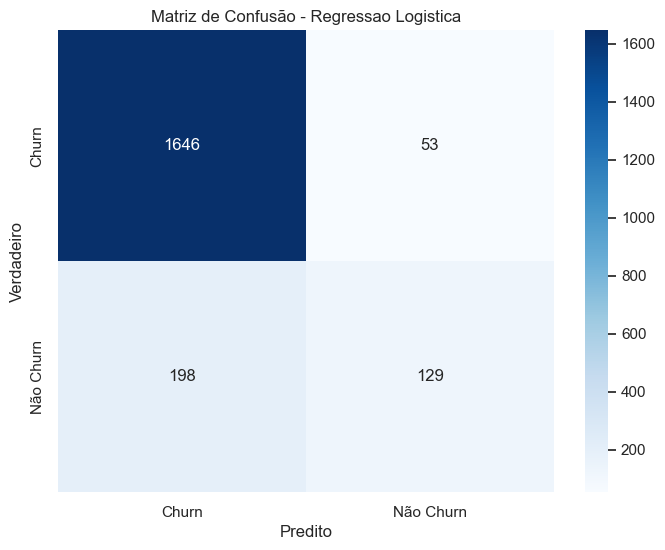



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1699
           1       0.71      0.39      0.51       327

    accuracy                           0.88      2026
   macro avg       0.80      0.68      0.72      2026
weighted avg       0.86      0.88      0.86      2026


Modelo de Machine Learning: Naive Bayes





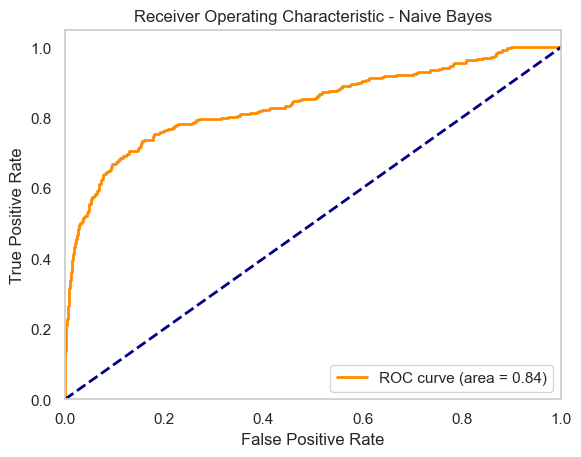



Acurácia: 0.8830207305034551




Confusion matrix 

 [[1600   99]
 [ 138  189]]

True Positives(TP) =  1600

True Negatives(TN) =  189

False Positives(FP) =  99

False Negatives(FN) =  138




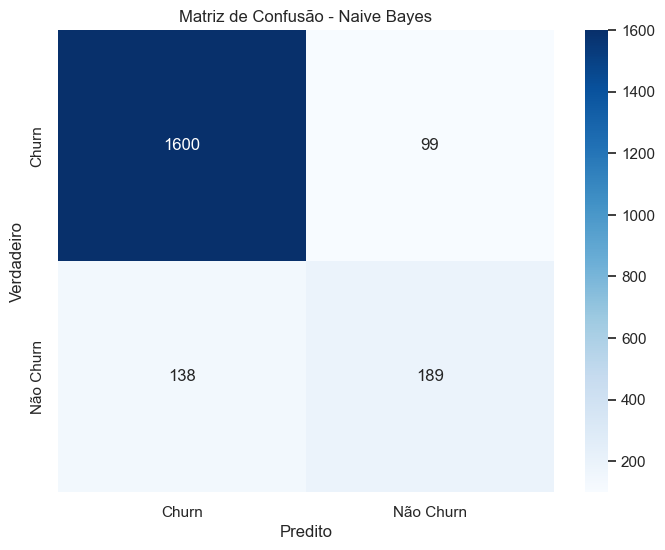



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1699
           1       0.66      0.58      0.61       327

    accuracy                           0.88      2026
   macro avg       0.79      0.76      0.77      2026
weighted avg       0.88      0.88      0.88      2026


Modelo de Machine Learning: Decision Tree Classifier





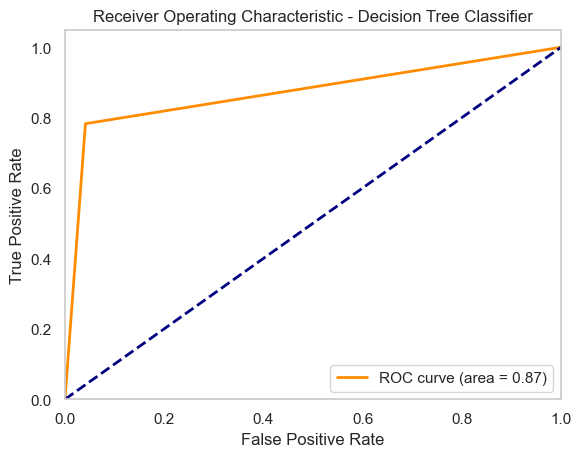



Acurácia: 0.9304047384007897




Confusion matrix 

 [[1629   70]
 [  71  256]]

True Positives(TP) =  1629

True Negatives(TN) =  256

False Positives(FP) =  70

False Negatives(FN) =  71




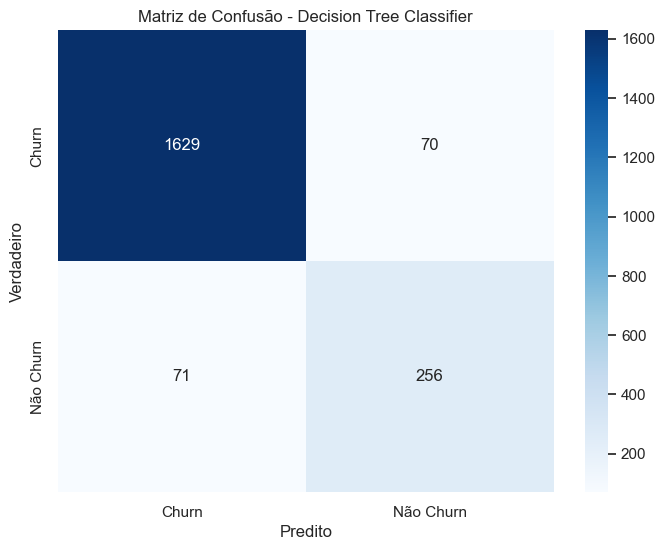



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.79      0.78      0.78       327

    accuracy                           0.93      2026
   macro avg       0.87      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026


Modelo de Machine Learning: Random Forest





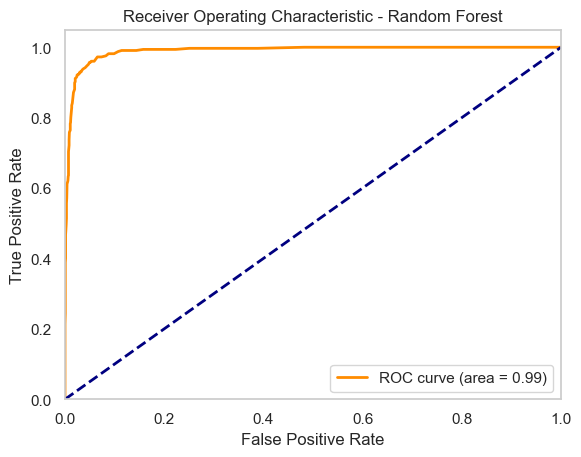



Acurácia: 0.9580454096742349




Confusion matrix 

 [[1679   20]
 [  65  262]]

True Positives(TP) =  1679

True Negatives(TN) =  262

False Positives(FP) =  20

False Negatives(FN) =  65




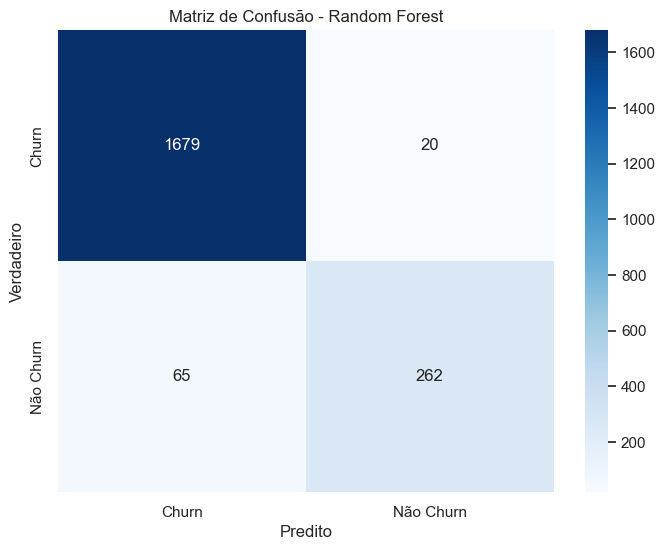



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1699
           1       0.93      0.80      0.86       327

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Modelo de Machine Learning: AdaBoost





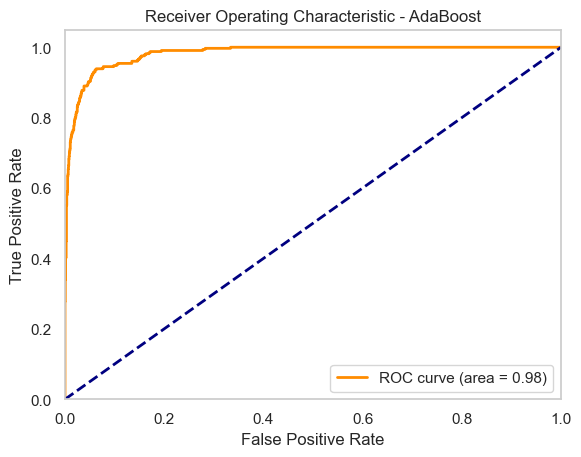



Acurácia: 0.9506416584402764




Confusion matrix 

 [[1660   39]
 [  61  266]]

True Positives(TP) =  1660

True Negatives(TN) =  266

False Positives(FP) =  39

False Negatives(FN) =  61




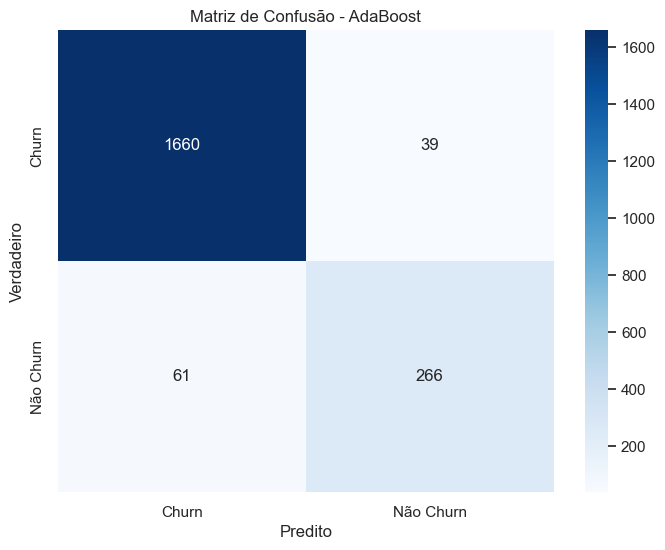



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1699
           1       0.87      0.81      0.84       327

    accuracy                           0.95      2026
   macro avg       0.92      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026


Modelo de Machine Learning: Gradient Boosting





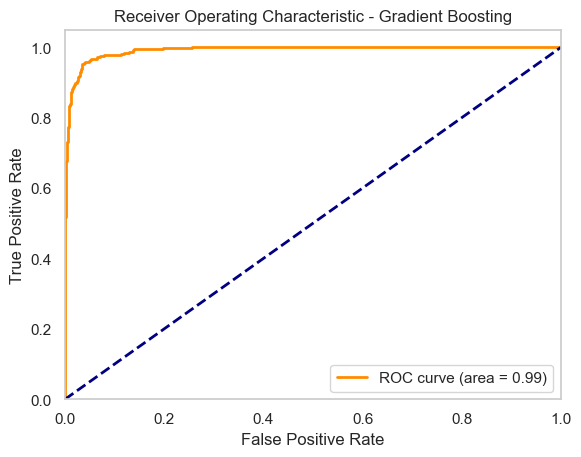



Acurácia: 0.9654491609081934




Confusion matrix 

 [[1680   19]
 [  51  276]]

True Positives(TP) =  1680

True Negatives(TN) =  276

False Positives(FP) =  19

False Negatives(FN) =  51




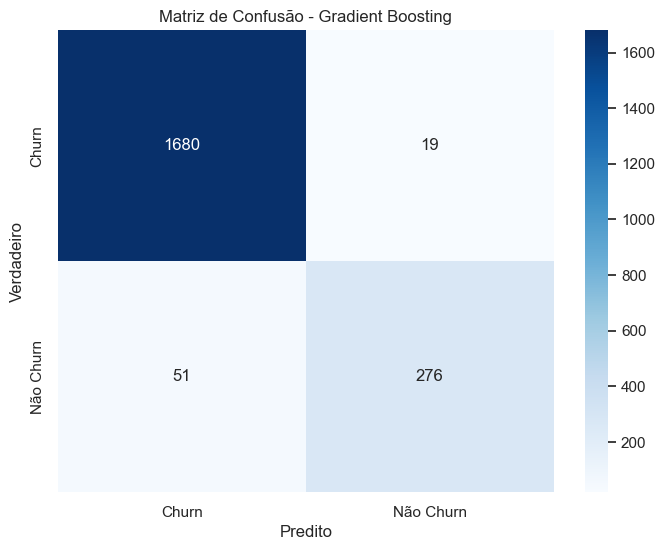



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1699
           1       0.94      0.84      0.89       327

    accuracy                           0.97      2026
   macro avg       0.95      0.92      0.93      2026
weighted avg       0.96      0.97      0.96      2026


Modelo de Machine Learning: XGBoost





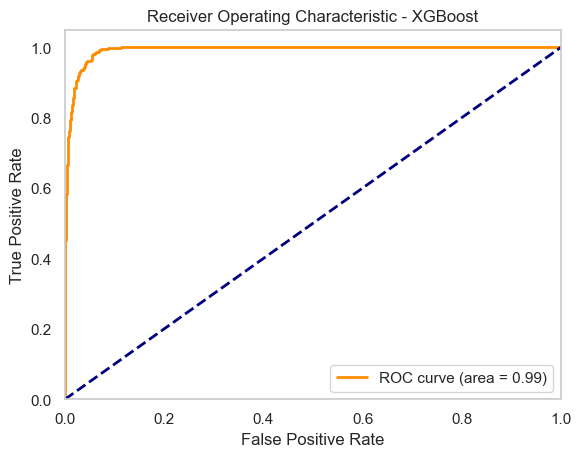



Acurácia: 0.9644619940769991




Confusion matrix 

 [[1665   34]
 [  38  289]]

True Positives(TP) =  1665

True Negatives(TN) =  289

False Positives(FP) =  34

False Negatives(FN) =  38




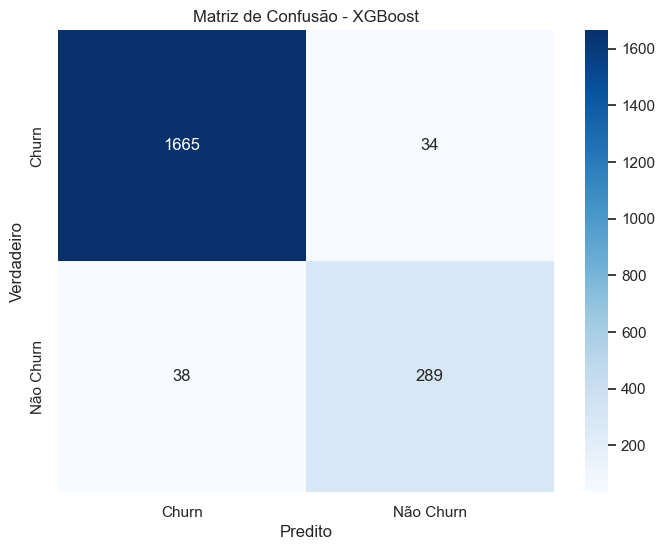



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.89      0.88      0.89       327

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705

Modelo de Machine Learning: LightGBM





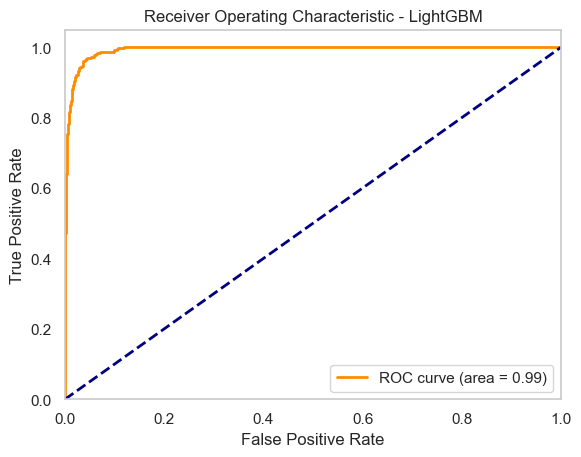



Acurácia: 0.9684106614017769




Confusion matrix 

 [[1672   27]
 [  37  290]]

True Positives(TP) =  1672

True Negatives(TN) =  290

False Positives(FP) =  27

False Negatives(FN) =  37




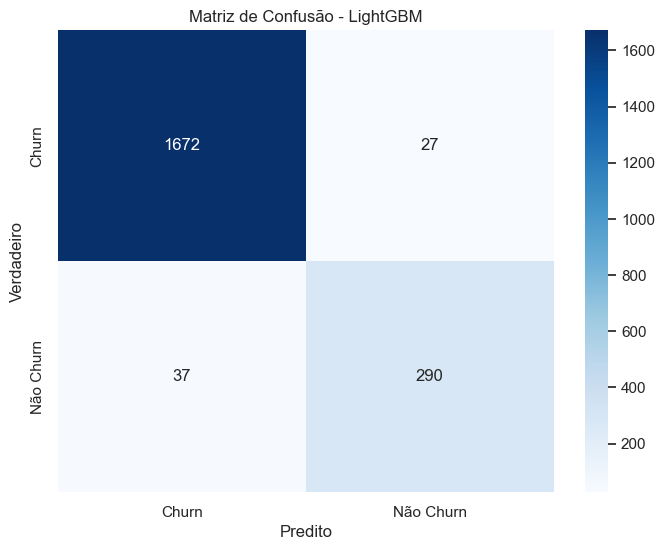



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1699
           1       0.91      0.89      0.90       327

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



In [29]:
# Iterando sobre cada modelo
for nome, modelo in modelos.items():

    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = modelo.predict(X_test)

    print()
    print("Modelo de Machine Learning:", nome)

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print()
    print()

    # Plotando a curva ROC
    print()
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - {}'.format(nome))
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()
    print()
    print()
    
    # Acurácia
    acc = accuracy_score(y_test, y_pred)
    print("Acurácia:", acc)
    print()
    print()

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print()
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    print()
    
    # Plotando a matriz de confusão com Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão - {}'.format(nome))
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro') 
    plt.xticks(ticks=[0.5, 1.5], labels=['Churn', 'Não Churn'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Churn', 'Não Churn'])
    plt.show()
    print()
    print()

    # Relatório de Classificação
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

**Avaliação dos Modelos e Seleção do Melhor Modelo: Explorando Métricas e Análise Detalhada**

**Avaliação dos Modelos**

Nesta fase crucial do projeto, procedemos à avaliação detalhada dos modelos de machine learning treinados anteriormente. Utilizando métricas de desempenho e técnicas de análise, buscamos identificar o modelo mais eficaz e robusto para a resolução de nosso problema específico.

**Métricas de Avaliação**

Ao avaliar os modelos, consideramos uma variedade de métricas de desempenho, que nos fornecem uma compreensão abrangente de sua eficácia em diferentes aspectos. Entre as métricas mais utilizadas estão:

**Acurácia:** A proporção de previsões corretas em relação ao total de previsões feitas pelo modelo.

**Precisão (Precision):** A proporção de verdadeiros positivos (instâncias corretamente classificadas como positivas) em relação ao total de instâncias classificadas como positivas pelo modelo.

**Revocação (Recall):** A proporção de verdadeiros positivos em relação ao total de instâncias positivas presentes nos dados.

**F1-Score:** A média harmônica entre precisão e revocação, fornecendo uma medida balanceada entre as duas métricas.

**Support:** O número de ocorrências reais de cada classe no conjunto de dados.

**Matriz de Confusão e Relatório de Classificação**

Além das métricas mencionadas, também exploramos a matriz de confusão e o relatório de classificação para uma análise mais detalhada do desempenho de cada modelo. A matriz de confusão nos fornece uma visão visual das previsões do modelo em relação aos rótulos reais, enquanto o relatório de classificação oferece uma descrição mais detalhada das métricas de desempenho para cada classe.

**Seleção do Melhor Modelo**

Após uma análise cuidadosa das métricas de avaliação, concluímos que o modelo de Regressão Logística demonstrou um desempenho notável e consistente em todas as métricas consideradas. Com uma acurácia elevada, precisão, recall, F1-Score e suporte satisfatórios, o modelo de Regressão Logística se destaca como o mais adequado para o nosso problema específico.

**Conclusão e Próximos Passos**

Com a seleção do melhor modelo, estamos bem posicionados para extrair insights valiosos dos dados e tomar decisões informadas. No entanto, este é apenas o primeiro passo em um processo contínuo de melhoria e refinamento. Nos próximos estágios do projeto, buscaremos otimizar ainda mais o modelo selecionado, explorar técnicas avançadas de ajuste de hiperparâmetros e considerar estratégias adicionais para melhorar o desempenho e a generalização do modelo em ambientes do mundo real.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>11. </b>Feature Importance - Interpretar os resultados do modelo com os valores SHAP </p></div>

**Análise das Feature Importance: Revelando os Fatores Mais Relevantes**

**Feature Importance**

Nesta etapa crucial da análise, exploramos a importância das features para entender quais variáveis têm maior impacto na predição do nosso modelo. A análise da importância das features oferece insights valiosos sobre quais aspectos dos dados são mais relevantes para a tomada de decisões do modelo.

**Identificação das Features Mais Relevantes**

Ao aplicar a análise de feature importance podemos identificar as features que têm maior aderência e impacto nas previsões do modelo. Essas features destacam-se por sua capacidade de influenciar significativamente as decisões do modelo, fornecendo informações críticas sobre os principais impulsionadores do fenômeno que estamos estudando.

**Interpretação dos Resultados**

Ao interpretar os resultados da análise de feature importance, podemos identificar padrões e insights importantes sobre o problema em questão. Por meio dessa análise, podemos descobrir quais variáveis têm maior influência na variável de interesse (por exemplo, "Churn" em um problema de previsão de churn) e como essas variáveis estão relacionadas entre si.

**Aplicação dos Insights**

Os insights obtidos com a análise de feature importance podem orientar decisões estratégicas em uma variedade de contextos. Por exemplo, esses insights podem ser utilizados para priorizar a alocação de recursos, identificar áreas de melhoria em processos de negócios ou até mesmo para direcionar ações específicas para mitigar riscos identificados.

**Conclusão**

A análise de feature importance é representa uma etapa fundamental na compreensão dos modelos de machine learning e na extração de insights valiosos dos dados. Ao identificar as features mais relevantes, podemos aprimorar a interpretação e confiança nos modelos, bem como orientar ações estratégicas com base em evidências sólidas e fundamentadas.

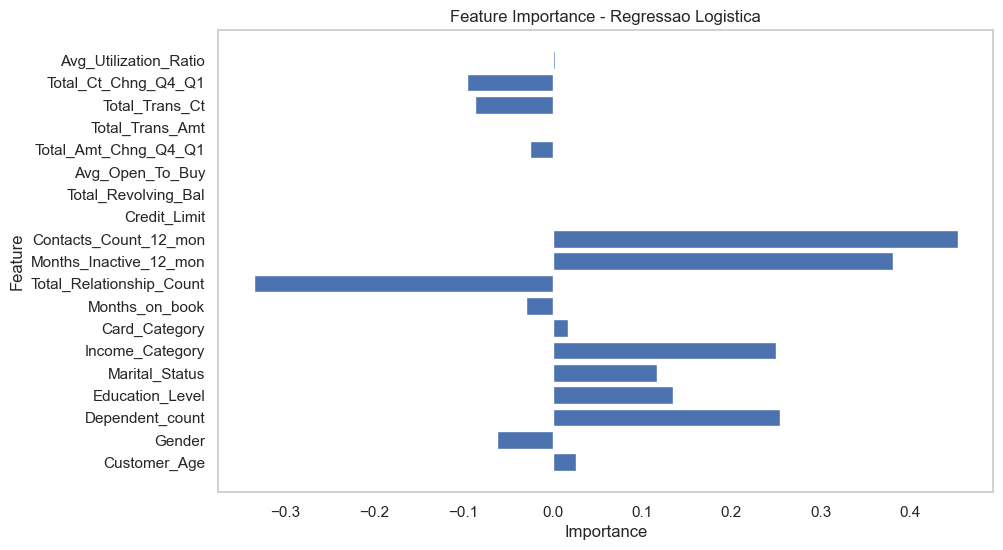

O modelo Naive Bayes não suporta a extração de importância de características.


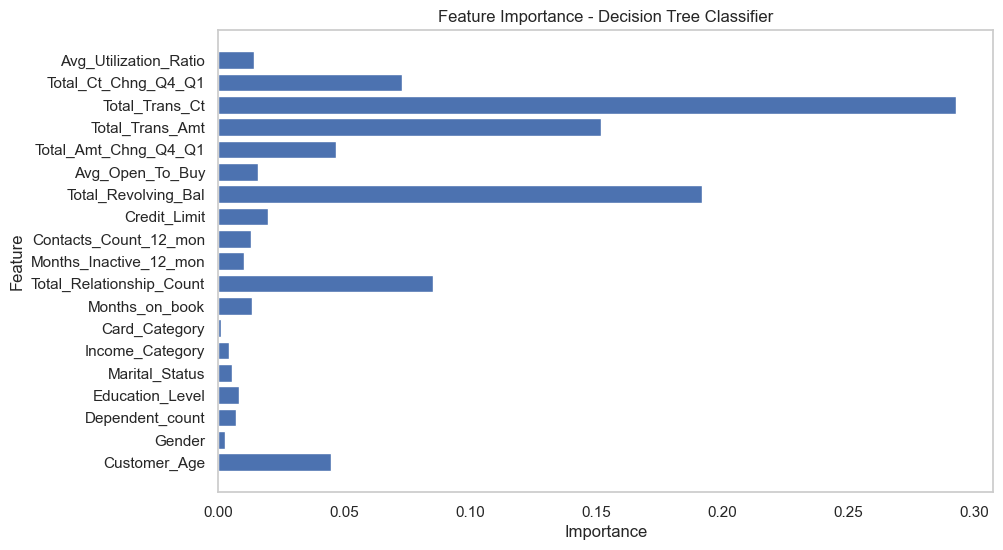

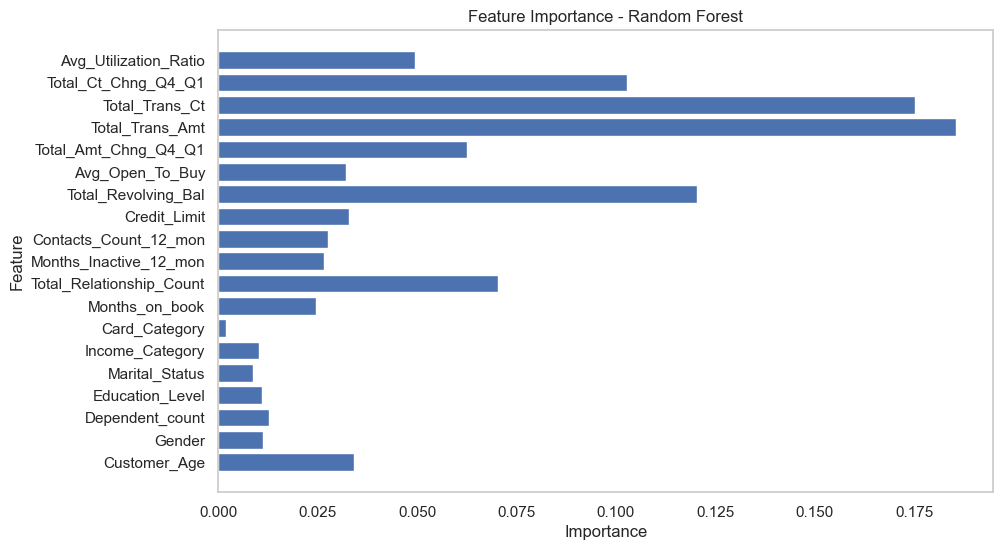

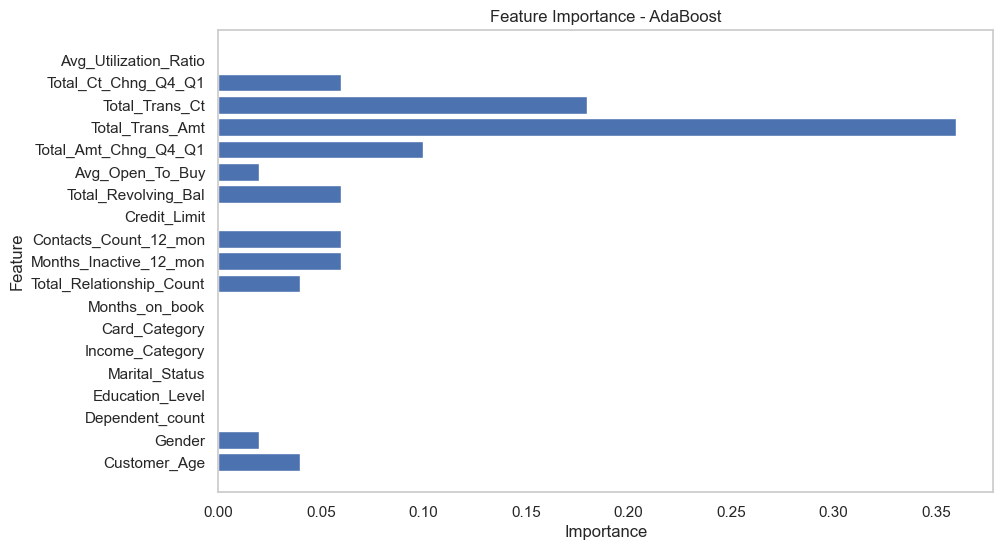

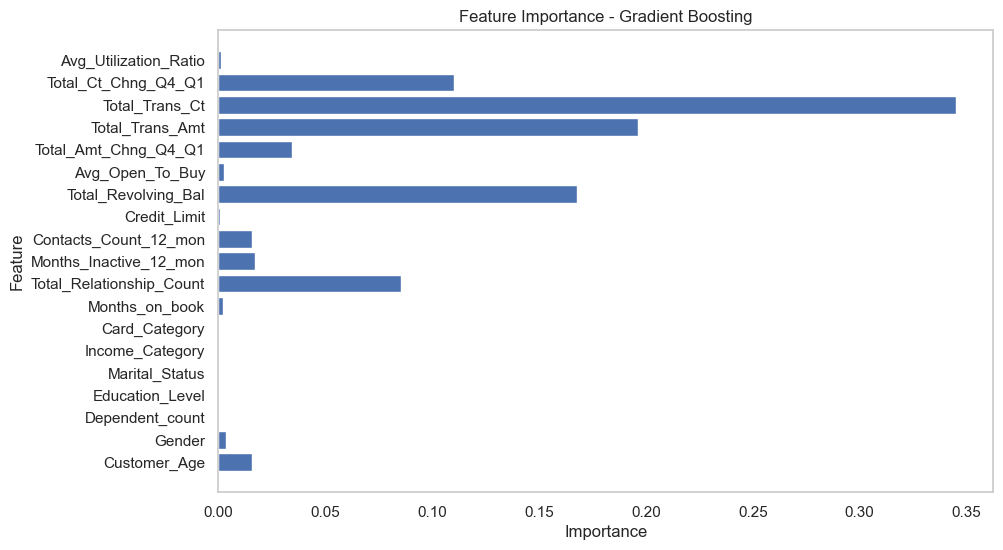

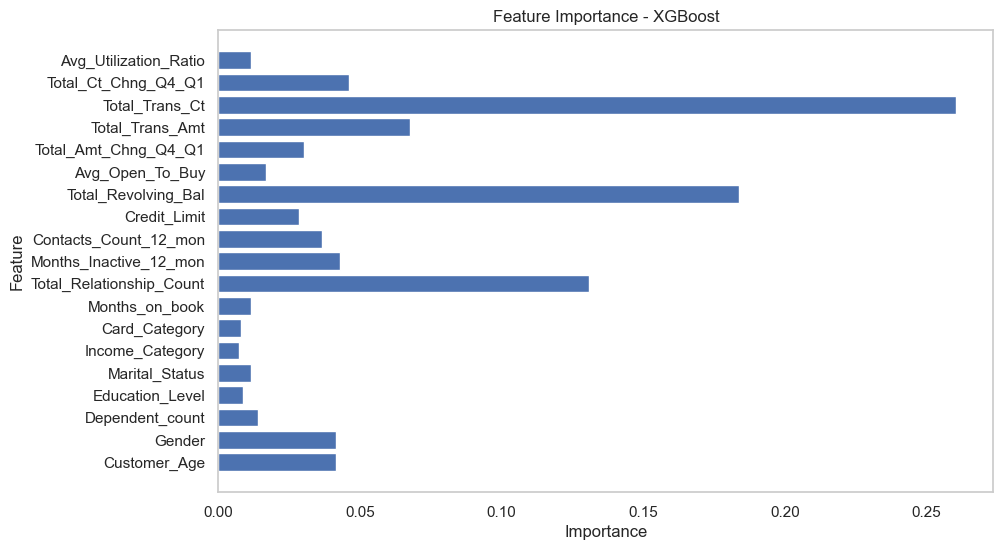

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705


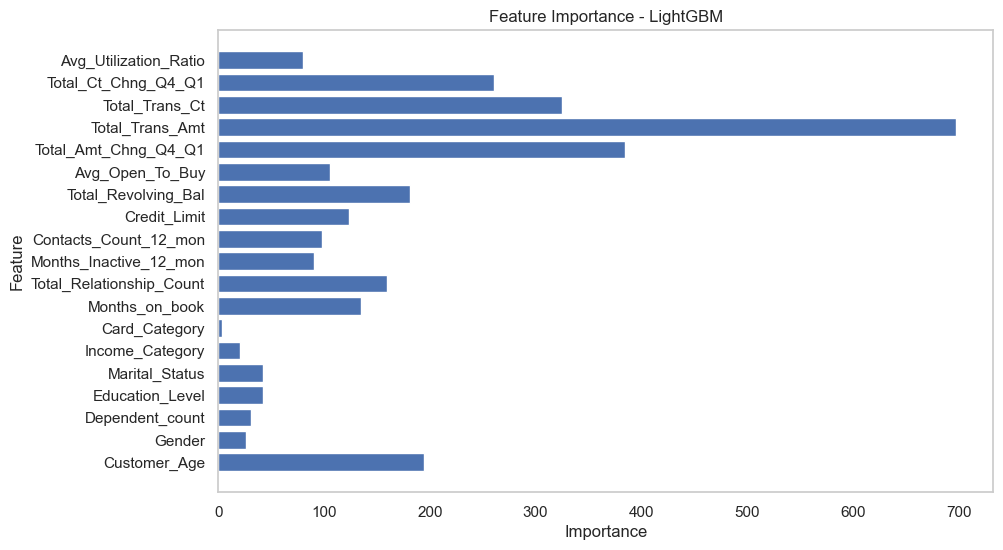

In [30]:
# Treinando os modelos e obtendo suas importâncias de características
for nome_modelo, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    if hasattr(modelo, 'feature_importances_'):
        importancias_caracteristicas = modelo.feature_importances_
    elif hasattr(modelo, 'coef_'):
        importancias_caracteristicas = modelo.coef_[0]
    else:
        importancias_caracteristicas = None

    if importancias_caracteristicas is not None:
        # Plotando as importâncias das características
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importancias_caracteristicas)), importancias_caracteristicas)
        plt.title(f"Feature Importance - {nome_modelo}")
        plt.ylabel("Feature")
        plt.xlabel("Importance")
        plt.grid(False)
        plt.yticks(range(len(importancias_caracteristicas)), X_train.columns) # Supondo que X_train seja um DataFrame pandas
        plt.show()
    else:
        print(f"O modelo {nome_modelo} não suporta a extração de importância de características.")


## Análise dos Modelos: Identificando o Modelo com Maior Aderência

Na análise da importância das características realizada pelo modelo LightGBM, um destaque notável recai sobre a variável "Total_Trans_Ct". Esta variável representa a contagem total de transações efetuadas por um cliente em um determinado período de tempo, seja ele mensal, trimestral ou anual. No contexto dos serviços financeiros, especialmente em relação a cartões de crédito, o número de transações realizadas é uma métrica fundamental para entender o comportamento e o engajamento do cliente.

A importância atribuída à variável "Total_Trans_Ct" pelo modelo LGBM sugere que ela desempenha um papel crucial na predição e no entendimento dos padrões de comportamento dos clientes em transações financeiras. Esta métrica é um reflexo direto da atividade financeira de um cliente e pode fornecer insights valiosos sobre sua saúde financeira, preferências de gastos e nível de envolvimento com os serviços oferecidos.

Ao considerar a aderência desta variável ao modelo LGBM, podemos inferir que sua inclusão contribui significativamente para a precisão das previsões geradas. No entanto, é importante ressaltar que a análise da importância das características não deve se limitar apenas a uma variável. Explorar outras características correlacionadas e sua influência no modelo pode enriquecer ainda mais a compreensão dos padrões de comportamento dos clientes e aprimorar a capacidade do modelo de fazer previsões precisas.

Assim, ao avaliar e interpretar a importância das características em um modelo como o LightGBM, é essencial adotar uma abordagem abrangente e holística, considerando não apenas as métricas individuais, mas também as interações complexas entre diferentes variáveis. Isso possibilitará uma análise mais completa e informada, resultando em insights mais robustos e decisões mais bem fundamentadas no contexto dos serviços financeiros.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>12. </b>Resultados modelos</p></div>


In [31]:
# Dicionário para armazenar as métricas

resultados_metricas = {'Modelo': [],
                       'Acurácia': [],
                       'Precision': [],
                       'Recall': [],
                       'F1-Score': [],
                       'Support': []}

# Iterando sobre cada modelo
for nome, modelo in modelos.items():
    
    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Predição no conjunto de teste
    y_pred = modelo.predict(X_test)

    # Calculando acurácia
    acc = accuracy_score(y_test, y_pred)
    
    # Calculando outras métricas usando classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Armazenando os resultados de acurácia e outras métricas no dicionário
    resultados_metricas['Modelo'].append(nome)
    resultados_metricas['Acurácia'].append(acc)
    resultados_metricas['Precision'].append(report['weighted avg']['precision'])
    resultados_metricas['Recall'].append(report['weighted avg']['recall'])
    resultados_metricas['F1-Score'].append(report['weighted avg']['f1-score'])
    resultados_metricas['Support'].append(report['weighted avg']['support'])

# Criando DataFrame com os resultados
df_metricas = pd.DataFrame(resultados_metricas)

# Exibindo o DataFrame ordenado pela coluna de acurácia em ordem decrescente
df_metricas_sorted = df_metricas.sort_values(by='Acurácia', ascending=False)
print()
df_metricas_sorted.head()

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705



,Modelo,Acurácia,Precision,Recall,F1-Score,Support
7,LightGBM,0.968411,0.968097,0.968411,0.968212,2026.0
5,Gradient Boosting,0.965449,0.964897,0.965449,0.964722,2026.0
6,XGBoost,0.964462,0.964298,0.964462,0.964374,2026.0
3,Random Forest,0.959033,0.958268,0.959033,0.957907,2026.0
4,AdaBoost,0.950642,0.949638,0.950642,0.949941,2026.0


## Resultados dos Modelos de Machine Learning: Identificando Oportunidades de Melhoria

Os resultados da avaliação dos modelos são bastante promissores. O modelo LightGBM obteve uma impressionante acurácia de 96.8%, demonstrando sua eficácia na classificação dos dados. Em seguida, o modelo Gradient Boosting apresentou um desempenho notável, com uma acurácia de 96.5%. Esses números são indicativos de que ambos os modelos são capazes de fazer previsões com alta precisão.

A alta acurácia alcançada pelo modelo LightGBM sugere que ele está pronto para ser implantado em um ambiente de produção. No entanto, ainda há oportunidades para aprimoramento, seja ajustando os hiperparâmetros para melhorar ainda mais o desempenho ou desenvolvendo pipelines mais eficientes para pré-processamento de dado 

Além disso, é importante considerar não apenas a acurácia, mas também outras métricas de desempenho, como recall, precisão e F1-score, especialmente em casos em que o conjunto de dados está desbalanceado ou requer uma ênfase específica em certos tipos de erros.

Investir tempo na otimização dos hiperparâmetros e na construção de pipelines mais robustos pode levar a ganhos adicionais de desempenho e confiabilidade do modelo. Além disso, é crucial monitorar continuamente o desempenho do modelo após a implantação, garantindo que ele mantenha sua precisão e relevância ao longo do tempo, à medida que novos dados são incorporados.

Em resumo, embora os resultados iniciais sejam promissores, há espaço para aprimoramento e refinamento, tanto no modelo LightGBM quanto no Gradient Boosting. Ao adotar uma abordagem iterativa e focada na melhoria contínua, podemos garantir que nossos modelos ofereçam as melhores previsões possíveis e permaneçam robustos e confiáveis em ambientes dinâmicos e em constante evolução.

# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>13. </b>Salvando modelos</p></div>


In [32]:
# Importando bibliotecas
from tqdm import tqdm
import pickle

# Diretório para salvar os modelos
models_dir = "ML_Churn_Prediction/models/models"

# Cria a pasta se ela não existir
os.makedirs(models_dir, exist_ok=True)

# Dicionário de modelos
modelos = { 
            # Modelo Regressão logística
            "Regressao Logistica": LogisticRegression(),
            
            # Modelo Naive Bayes
            "Naive Bayes": GaussianNB(),
               
            # Modelo Decision Tree
            "Decision Tree Classifier": DecisionTreeClassifier(),
            
            # Modelo Random Forest
            "Random Forest": RandomForestClassifier(),
            
            # Modelo AdaBoost
            "AdaBoost": AdaBoostClassifier(),
            
            # Modelo Gradient Boosting
            "Gradient Boosting": GradientBoostingClassifier(),
            
            # Modelo XGBoost
            "XGBoost": XGBClassifier(),
            
            # Modelo LightGBM
            "LightGBM": LGBMClassifier()
}

# Treinamento de modelos com tqdm
for nome, modelo in tqdm(modelos.items(), desc="Treinando modelos", total=len(modelos)):

    # Treinamento modelo
    modelo.fit(X_train, y_train)

    # Score modelo
    score = modelo.score(X_test, y_test)
    
    # Salvar o modelo treinado com pickle
    model_path = os.path.join(models_dir, f"{nome}_model.pkl")
    with open(model_path, 'wb') as file:
        pickle.dump(modelo, file)
    
    # Previsão modelo
    modelo_pred = modelo.predict(X_test)

    # Visualizando os modelos
    print()
    tqdm.write(f"Modelo: {nome} possui Acurácia {score:.2%} e foi salvo como {model_path}")

Treinando modelos:   0%|                                                                         | 0/8 [00:00<?, ?it/s]

Treinando modelos:  25%|████████████████▎                                                | 2/8 [00:00<00:00, 17.16it/s]

Modelo: Regressao Logistica possui Acurácia 87.61% e foi salvo como ML_Churn_Prediction/models/models\Regressao Logistica_model.pkl

Modelo: Naive Bayes possui Acurácia 88.30% e foi salvo como ML_Churn_Prediction/models/models\Naive Bayes_model.pkl

Modelo: Decision Tree Classifier possui Acurácia 92.94% e foi salvo como ML_Churn_Prediction/models/models\Decision Tree Classifier_model.pkl


Treinando modelos:  50%|████████████████████████████████▌                                | 4/8 [00:02<00:02,  1.39it/s]


Modelo: Random Forest possui Acurácia 95.76% e foi salvo como ML_Churn_Prediction/models/models\Random Forest_model.pkl


Treinando modelos:  62%|████████████████████████████████████████▋                        | 5/8 [00:03<00:02,  1.38it/s]


Modelo: AdaBoost possui Acurácia 95.06% e foi salvo como ML_Churn_Prediction/models/models\AdaBoost_model.pkl


Treinando modelos:  88%|████████████████████████████████████████████████████████▉        | 7/8 [00:06<00:01,  1.15s/it]


Modelo: Gradient Boosting possui Acurácia 96.59% e foi salvo como ML_Churn_Prediction/models/models\Gradient Boosting_model.pkl

Modelo: XGBoost possui Acurácia 96.45% e foi salvo como ML_Churn_Prediction/models/models\XGBoost_model.pkl
[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705


Treinando modelos: 100%|█████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Modelo: LightGBM possui Acurácia 96.84% e foi salvo como ML_Churn_Prediction/models/models\LightGBM_model.pkl


# <div style="color:green;display:fill;border-radius:5px;background-color:#9DCDD1;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:black;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b>14. </b>Conclusão</p></div>


A conclusão deste projeto é de extrema importância, pois revelou insights valiosos sobre o churn, ou seja, a rotatividade de clientes, no contexto dos serviços de cartão de crédito. Durante a análise dos dados, identificamos insights cruciais que podem indicar se um cliente está inclinado a cancelar seu cartão de crédito ou se está interessado em adquirir novos benefícios oferecidos pelo cartão.

Este projeto abordou diversas etapas essenciais, desde a análise inicial dos dados até a implementação e avaliação de modelos de machine learning. Destacam-se áreas-chave, como o pré-processamento dos dados para garantir qualidade e consistência, a engenharia de características para extrair informações relevantes, e a divisão adequada entre conjuntos de treinamento e teste para avaliar o desempenho dos modelos.

Além disso, realizamos o treinamento de diversos modelos de machine learning, incluindo algoritmos como Naive Bayes, Regressão Logística, LightGBM, XGBoost, entre outros. Dentro deste conjunto, o modelo LightGBM se destacou com um desempenho excelente, fornecendo resultados que superaram as expectativas. A análise da matriz de confusão revelou que o modelo LightGBM obteve 290 True Positives, 1672 True Negatives, 37 False Positives e 27 False Negatives.

No entanto, vale ressaltar que o sucesso deste projeto não se limita apenas ao desempenho do modelo final. Cada etapa do processo, desde a limpeza dos dados até a otimização dos modelos, contribuiu para uma compreensão mais profunda do fenômeno de churn e dos padrões de comportamento dos clientes.

Olhando para o futuro, há oportunidades para expandir este projeto, explorando outras técnicas de modelagem, como redes neurais, e incorporando dados adicionais para enriquecer ainda mais as previsões. Além disso, a implementação de estratégias de retenção de clientes baseadas nos insights gerados pode ajudar a mitigar o churn e promover a fidelidade dos clientes.

Em suma, este projeto demonstrou o poder da análise de dados e da modelagem preditiva na identificação e compreensão do churn em serviços de cartão de crédito. Com uma abordagem abrangente e orientada para insights, podemos tomar decisões mais informadas e estratégicas para melhorar a experiência do cliente e impulsionar o sucesso do negócio.






